In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [25]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [6]:
print(df['y'].value_counts())

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [7]:
df['y']=df['y'].apply(lambda x:1 if x==1 else 0)

In [8]:
print(df['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [9]:
non_seizure , seizure =df['y'].value_counts()
print('Number of non seizures: ',non_seizure)
print('Number of seizures',seizure)

Number of non seizures:  9200
Number of seizures 2300


/tmp/ipython-input-10-2434654594.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn.countplot(x=df['y'], palette='Set2')


Text(0, 0.5, 'Number')

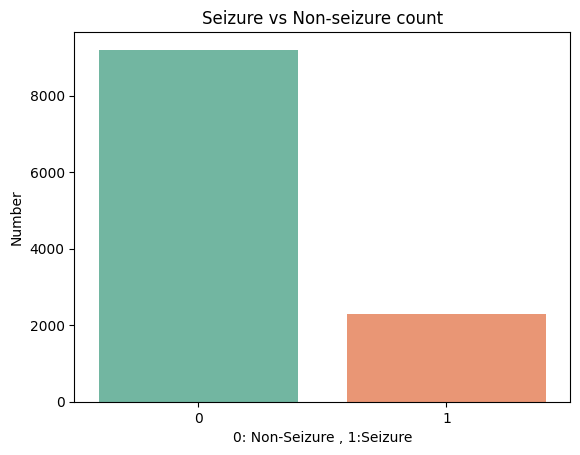

In [10]:
ax = sn.countplot(x=df['y'], palette='Set2')
ax.set_title('Seizure vs Non-seizure count')
ax.set_xlabel('0: Non-Seizure , 1:Seizure')
ax.set_ylabel('Number')

In [11]:
df.isnull().sum()

,0
Unnamed,0
X1,0
X2,0
X3,0
X4,0
...,...
X175,0
X176,0
X177,0
X178,0


In [12]:
print(df.dtypes)

Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X=df.drop(['y','Unnamed'],axis=1)
y=df['y']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
print('Accuracy :' , accuracy_score(y_test,y_predict))
print('Confusion matrix : \n',confusion_matrix(y_test,y_predict))
print('Classification Report:\n',classification_report(y_test,y_predict))

Accuracy : 0.818695652173913
Confusion matrix : 
 [[1834    1]
 [ 416   49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1835
           1       0.98      0.11      0.19       465

    accuracy                           0.82      2300
   macro avg       0.90      0.55      0.54      2300
weighted avg       0.85      0.82      0.75      2300



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100 , random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test,y_pred_rf))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_rf))
print('Random Forest Classification Report: \n',classification_report(y_test,y_pred_rf))

Random Forest Accuracy: 0.9795652173913043
Confusion Matrix: 
 [[1814   21]
 [  26  439]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.95      0.94      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



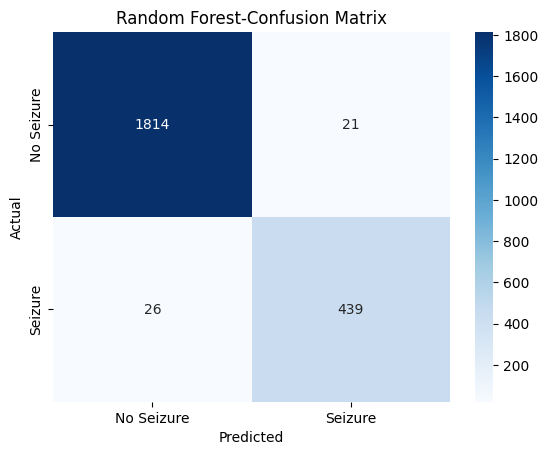

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred_rf)

# plt=figure(figsize=(6,5))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Seizure', 'Seizure'], yticklabels=['No Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest-Confusion Matrix')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model_xgb=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test,y_pred_xgb))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred_xgb))
print(' Classification Report: \n',classification_report(y_test,y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9747826086956521
Confusion Matrix: 
 [[1823   12]
 [  46  419]]
 Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1835
           1       0.97      0.90      0.94       465

    accuracy                           0.97      2300
   macro avg       0.97      0.95      0.96      2300
weighted avg       0.97      0.97      0.97      2300



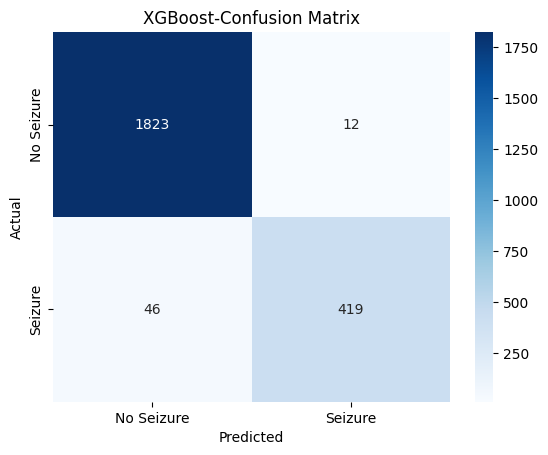

In [ ]:


cm=confusion_matrix(y_test,y_pred_xgb)

# plt=figure(figsize=(6,5))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Seizure', 'Seizure'], yticklabels=['No Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost-Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
param_grid={
    'n_estimators':[100,200],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False]
}

In [ ]:
rf=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         scoring='recall',
                         cv=5,
                         n_jobs=-1,
                         verbose=2
                        )
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
best_rf=grid_search.best_estimator_
print("Best parameters:",grid_search.best_params_)

#predict
y_pred_best_rf=best_rf.predict(X_test)

#evaluate
print("Classification Report: ",classification_report(y_test,y_pred_best_rf))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_best_rf))

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Deep Learning


In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Create MLP model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # prevents overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6243 - loss: 18.1446 - val_accuracy: 0.7470 - val_loss: 4.1083
Epoch 2/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7260 - loss: 5.7408 - val_accuracy: 0.6817 - val_loss: 3.3123
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - loss: 3.4657 - val_accuracy: 0.7326 - val_loss: 2.1320
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7721 - loss: 2.4767 - val_accuracy: 0.7309 - val_loss: 1.5439
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7806 - loss: 1.7080 - val_accuracy: 0.7870 - val_loss: 1.0363
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8242 - loss: 1.0573 - val_accuracy: 0.8257 - val_loss: 0.6783
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8343 - loss: 0.8244 - val_accuracy: 0.8752 - val_loss: 0.4277
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.5551 - val_accuracy: 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[1813   22]
 [  44  421]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1835
           1       0.95      0.91      0.93       465

    accuracy                           0.97      2300
   macro avg       0.96      0.95      0.95      2300
weighted avg       0.97      0.97      0.97      2300



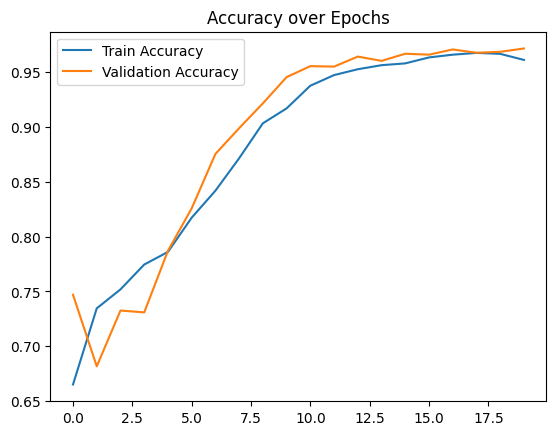

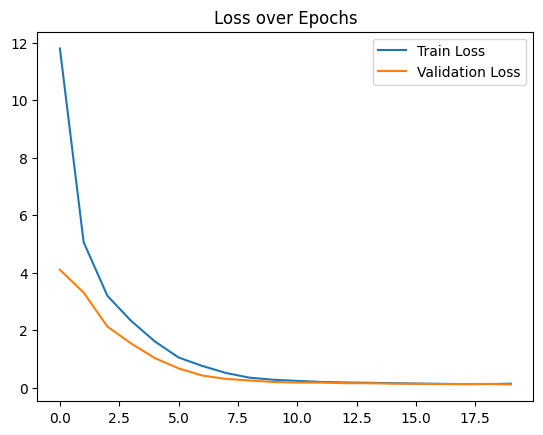

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


Hyper parameter tunning of deep learning - mlp

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Dense(256,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
optimizer=Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8429 - loss: 0.4004 - val_accuracy: 0.9609 - val_loss: 0.1283
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9574 - loss: 0.1347 - val_accuracy: 0.9735 - val_loss: 0.0789
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9716 - loss: 0.0898 - val_accuracy: 0.9691 - val_loss: 0.0874
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9706 - loss: 0.0873 - val_accuracy: 0.9713 - val_loss: 0.0732
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9730 - loss: 0.0805 - val_accuracy: 0.9678 - val_loss: 0.0809
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9716 - loss: 0.0745 - val_accuracy: 0.9696 - val_loss: 0.0726
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9750 - loss: 0.0732 - val_accuracy: 0.9722 - val_loss: 0.0702
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9773 - loss: 0.0706 - val_accuracy: 0

In [24]:
y_pred_prob=model.predict(X_test)
y_pred=(y_pred_prob>0.5).astype('int32')
from sklearn.metrics import classification_report , confusion_matrix
print ('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\nClassification report:')
print(classification_report(y_test,y_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[1825   10]
 [  45  420]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.98      0.90      0.94       465

    accuracy                           0.98      2300
   macro avg       0.98      0.95      0.96      2300
weighted avg       0.98      0.98      0.98      2300

